In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('GDPCountry.csv')

In [3]:
df.head()

,Country,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.shape

(227, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 19 columns):
Country                               227 non-null object
Population                            227 non-null int64
Area_sqm                              227 non-null int64
Pop_Density_per sqm                   227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate                             224 non-null float64
Deathrate      

In [6]:
len(df.Country.unique())
# we are dropping country as it is unique for each row
# or we can replace the country as index

227

In [7]:
df = df.set_index('Country')
df.head(2)

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


## MISSING VALUE

In [8]:
df.isnull().sum()

Population                             0
Area_sqm                               0
Pop_Density_per sqm                    0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
df.isnull().sum() / len(df) * 100

Population                            0.000000
Area_sqm                              0.000000
Pop_Density_per sqm                   0.000000
Coastline (coast/area ratio)          0.000000
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
GDP ($ per capita)                    0.440529
Literacy (%)                          7.929515
Phones (per 1000)                     1.762115
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Climate                               9.691630
Birthrate                             1.321586
Deathrate                             1.762115
Agriculture                           6.607930
Industry                              7.048458
Service                               6.607930
dtype: float64

In [10]:
#! pip install missingpy
from missingpy import KNNImputer
#from sklearn.impute import KNNImputer

impu = KNNImputer()

In [11]:
df_1 = impu.fit_transform(df)
df_1 = pd.DataFrame(df_1, columns = df.columns, index = df.index)
df_1.head(2)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [12]:
df_1.isnull().sum()

Population                            0
Area_sqm                              0
Pop_Density_per sqm                   0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## Outlier Treatment

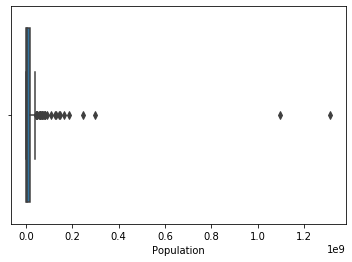

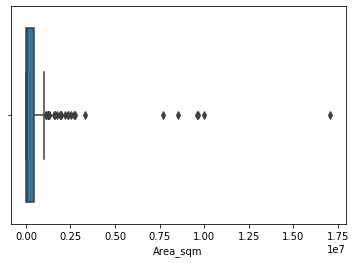

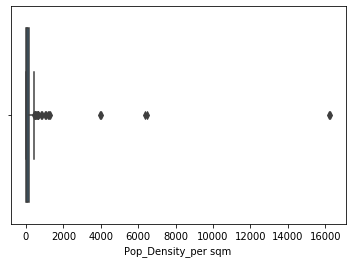

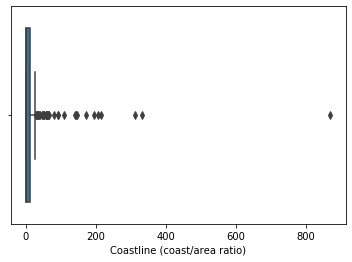

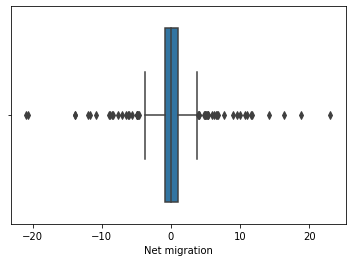

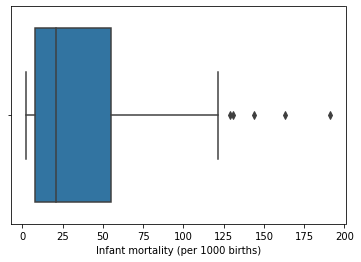

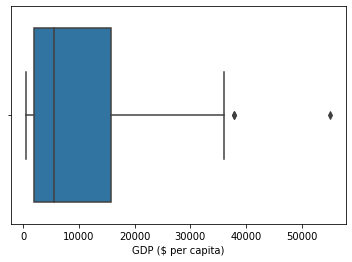

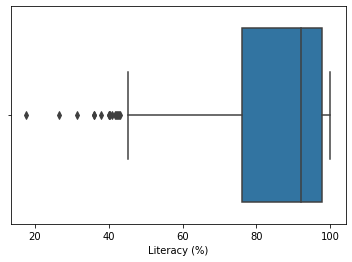

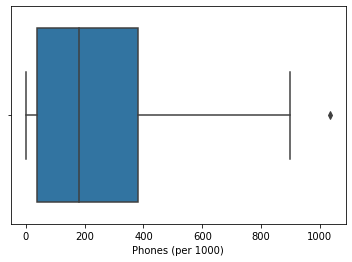

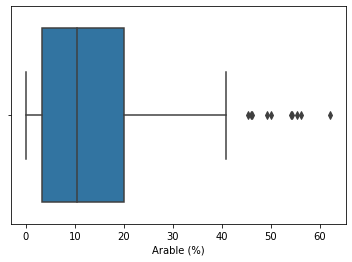

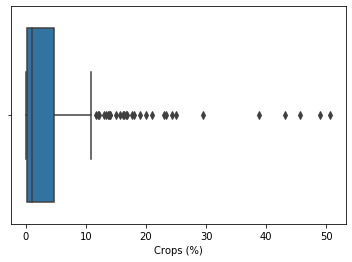

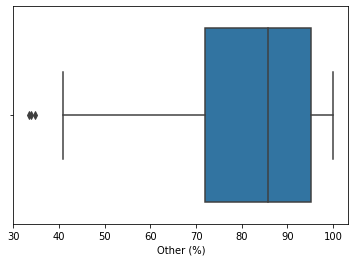

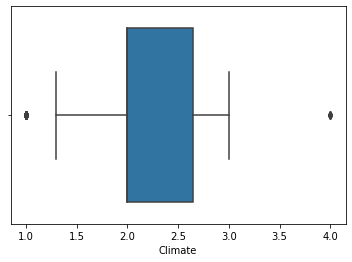

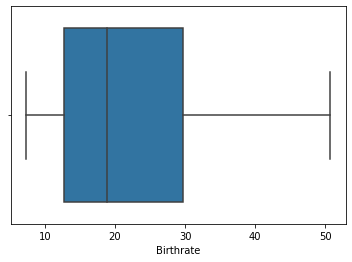

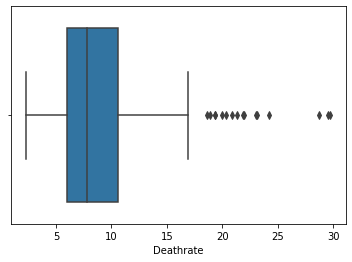

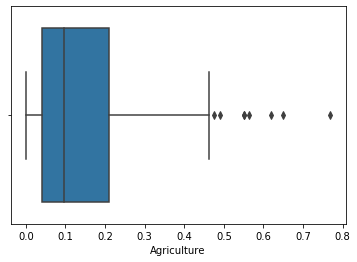

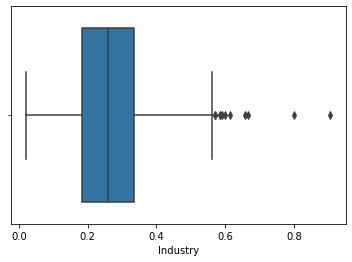

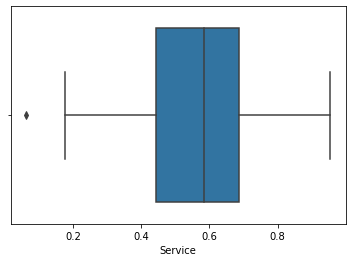

In [13]:
for i in df_1.columns:
    sns.boxplot(df_1[i])
    plt.show()

In [14]:
df_1.shape

(227, 18)

In [15]:
for i in df_1.columns:
    q1 = df_1[i].quantile(0.25)
    q3 = df_1[i].quantile(0.75)
    IQR  = q3-q1
    ub = q3 + 1.5*IQR #upper bound
    lb = q1 - 1.5*IQR #lower bound
    uc = df_1[i].quantile(0.99) #upper cap
    lc = df_1[i].quantile(0.01) #lower cap
    for ind1 in df_1[i].index:
        if df_1.loc[ind1,i]> ub:
            df_1.loc[ind1,i] = uc
        if df_1.loc[ind1,i]< lb:
            df_1.loc[ind1,i] = lc

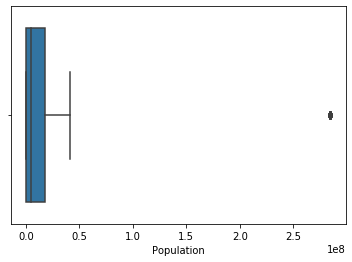

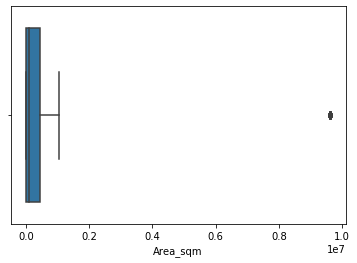

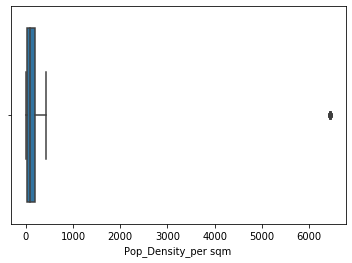

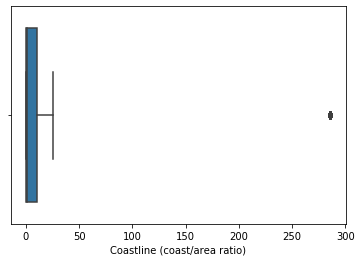

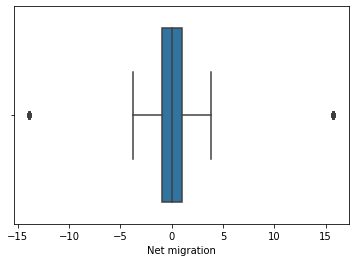

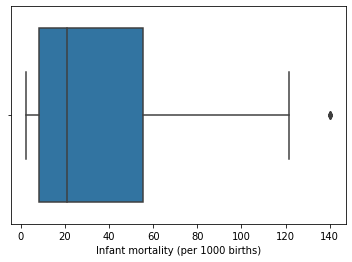

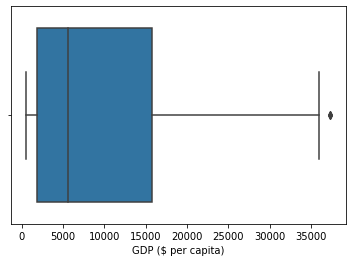

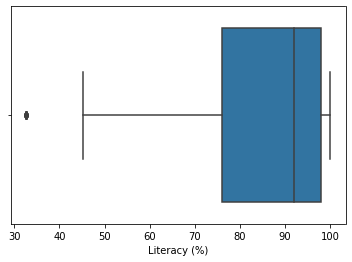

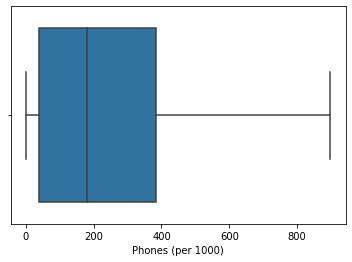

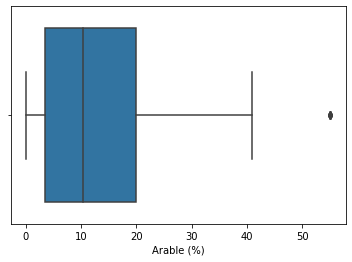

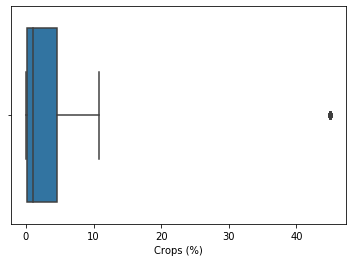

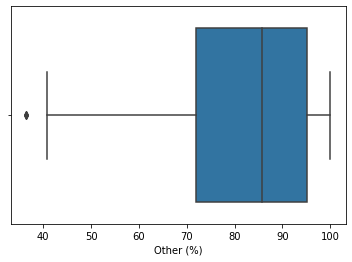

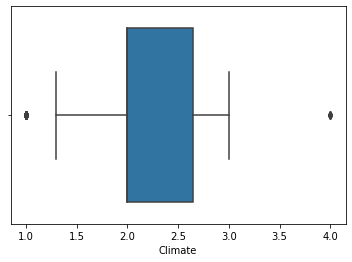

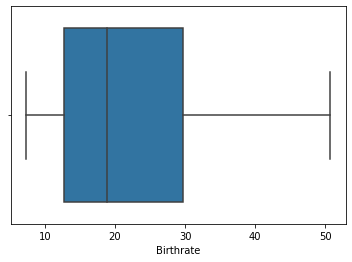

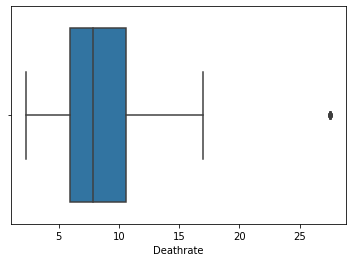

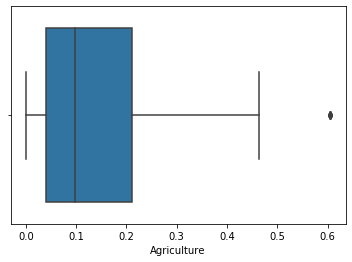

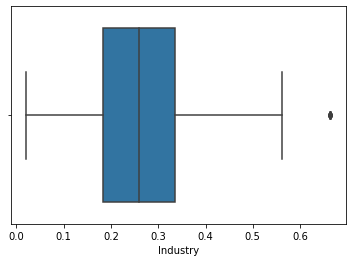

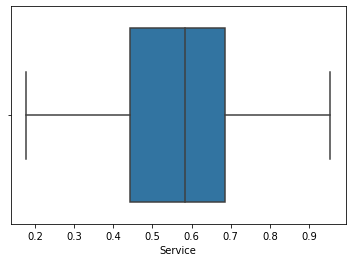

In [16]:
for i in df_1.columns:
    sns.boxplot(df_1[i])
    plt.show()

## Input as X Output/ Target as Y

In [17]:
X = df_1.drop('GDP ($ per capita)', axis = 1)
y = df_1['GDP ($ per capita)']

In [18]:
xc = sm.add_constant(X)

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## OLS model

In [19]:
ols = sm.OLS(y,xc).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.40e-63
Time:                        10:28:23   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               8642.6765   1.21e+04      0.715      0.475   -1.52e+04    3.25e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     6.21e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#fstat less than 0.05 model is significant

## Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns, index = X.index)
xc_scaled = sm.add_constant(X_scaled)

ols_scaled = sm.OLS(y,xc_scaled).fit()
ols_scaled.summary()

C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.40e-63
Time:                        10:28:23   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9620.3348    299.480     32.123      0.000    9029.946    1.02e+04
Population                           155.5794    356.182      0.437      0.663    -546.590     857.749
Area_sqm                             -59.3790    357.475     -0.166      0.868    -764.099     645.341
Pop_Density_per sqm                   51.8321    346.271      0.150      0.881    -630.799     734.463
Coastline (coast/area ratio)       -1581.3918    402.751     -3.926      0.000   -2375.366    -787.417
Net migration                       2115.4650    328.636      6.437      0.000    1467.598    2763.331
Infant mortality (per 1000 births) -1287.6527    923.107     -1.395      0.165   -3107.447     532.142
Literacy (%)                          -9.7969    497.915     -0.020      0.984    -991.376     971.782
Phones (per 1000)                   7198.9293    538.933     13.358      0.000    6136.488    8261.371
Arable (%)                         -1011.6755    970.714     -1.042      0.299   -2925.321     901.970
Crops (%)                           -321.7995    586.161     -0.549      0.584   -1477.345     833.746
Other (%)                           -553.4537   1126.368     -0.491      0.624   -2773.953    1667.046
Climate                             -126.8755    379.696     -0.334      0.739    -875.400     621.649
Birthrate                           -342.2609    741.738     -0.461      0.645   -1804.507    1119.985
Deathrate                            737.4182    474.695      1.553      0.122    -198.385    1673.221
Agriculture                         -651.6274   1340.186     -0.486      0.627   -3293.643    1990.389
Industry                             287.9492   1218.184      0.236      0.813   -2113.554    2689.453
Service                             -189.3032   1513.260     -0.125      0.901   -3172.512    2793.906
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X_scaled.head()

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,-0.115094,-0.220266,-0.347864,-0.470180,2.143829,3.079871,-2.537552,-1.041107,-0.132135,-0.502354,0.375437,-1.694570,2.210162,3.055247,1.612835,-0.263552,-1.201003
Albania,-0.414949,-0.418770,-0.306272,-0.458127,-1.993115,-0.393970,0.181254,-0.736564,0.539398,-0.218337,-0.449624,1.260999,-0.631504,-0.738826,0.583345,-0.645495,0.014199
Algeria,-0.094652,2.659029,-0.366433,-0.469797,-0.107041,-0.116716,-0.650571,-0.705662,-0.799921,-0.500325,0.932166,-1.694570,-0.448316,-0.842529,-0.327892,2.850162,-1.701740
American Samoa,-0.453407,-0.427929,-0.216248,2.263057,-1.993115,-0.752237,0.710596,0.106750,-0.291774,2.527233,-0.417649,-0.216785,0.031762,-1.070336,-0.199902,-0.476559,0.568673
Andorra,-0.453260,-0.427843,-0.291340,-0.470180,2.143829,-0.904902,0.861837,1.171305,-0.874869,-0.517231,1.010534,1.260999,-1.209041,-0.563721,-0.670128,-0.394294,0.913082


### partial scaling

In [23]:
## partial scaling

X_partial_sc = X - X.mean()
xp_sc = sm.add_constant(X_partial_sc)

In [24]:
ols_partial_sc = sm.OLS(y,xp_sc).fit()
ols_partial_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     49.48
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.40e-63
Time:                        10:28:23   Log-Likelihood:                -2222.8
No. Observations:                 227   AIC:                             4482.
Df Residuals:                     209   BIC:                             4543.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               9620.3348    299.480     32.123      0.000    9029.946    1.02e+04
Population                          1.698e-06   3.89e-06      0.437      0.663   -5.97e-06    9.36e-06
Area_sqm                           -1.905e-05      0.000     -0.166      0.868      -0.000       0.000
Pop_Density_per sqm                    0.0281      0.188      0.150      0.881      -0.343       0.399
Coastline (coast/area ratio)         -15.1276      3.853     -3.926      0.000     -22.723      -7.532
Net migration                        295.1782     45.856      6.437      0.000     204.779     385.577
Infant mortality (per 1000 births)   -37.6590     26.997     -1.395      0.165     -90.881      15.563
Literacy (%)                          -0.4939     25.102     -0.020      0.984     -49.979      48.991
Phones (per 1000)                     32.2409      2.414     13.358      0.000      27.483      36.999
Arable (%)                           -75.8229     72.753     -1.042      0.299    -219.247      67.601
Crops (%)                            -21.7611     39.638     -0.549      0.584     -99.903      56.381
Other (%)                            -34.6986     70.617     -0.491      0.624    -173.912     104.515
Climate                             -187.4946    561.108     -0.334      0.739   -1293.652     918.663
Birthrate                            -30.8857     66.935     -0.461      0.645    -162.839     101.068
Deathrate                            125.3649     80.701      1.553      0.122     -33.726     284.456
Agriculture                        -4532.7267   9322.350     -0.486      0.627   -2.29e+04    1.38e+04
Industry                            2115.0018   8947.628      0.236      0.813   -1.55e+04    1.98e+04
Service                            -1155.9880   9240.786     -0.125      0.901   -1.94e+04    1.71e+04
==============================================================================
Omnibus:                        9.555   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.716
Skew:                           0.209   Prob(JB):                     0.000387
Kurtosis:                       4.220   Cond. No.                     4.75e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ASSUMPTIONS

### 1. MULTICOLLINEARITY

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_partial_sc.values,i) for i in range(X_partial_sc.shape[1]) ]
vif['Feature'] = X_partial_sc.columns
vif.sort_values('VIF', ascending = False)

,VIF,Feature
16,25.532397,Service
14,20.026042,Agriculture
15,16.545912,Industry
10,14.145739,Other (%)
8,10.506242,Arable (%)
5,9.500994,Infant mortality (per 1000 births)
12,6.134302,Birthrate
9,3.830876,Crops (%)
7,3.238427,Phones (per 1000)
6,2.764233,Literacy (%)


In [27]:
X_partial_sc2 = X_partial_sc.drop('Service', axis = 1)

In [28]:
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X_partial_sc2.values,i) for i in range(X_partial_sc2.shape[1]) ]
vif2['Feature'] = X_partial_sc2.columns
vif2.sort_values('VIF', ascending = False)

,VIF,Feature
10,14.141041,Other (%)
8,10.504615,Arable (%)
5,9.466748,Infant mortality (per 1000 births)
12,6.134036,Birthrate
9,3.830859,Crops (%)
14,3.252902,Agriculture
7,3.212241,Phones (per 1000)
6,2.740219,Literacy (%)
13,2.508962,Deathrate
3,1.780749,Coastline (coast/area ratio)


In [29]:
X_partial_sc3 = X_partial_sc2.drop('Other (%)', axis = 1)

In [30]:
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X_partial_sc3.values,i) for i in range(X_partial_sc3.shape[1]) ]
vif2['Feature'] = X_partial_sc3.columns
vif2.sort_values('VIF', ascending = False)

,VIF,Feature
5,9.437339,Infant mortality (per 1000 births)
11,6.065702,Birthrate
13,3.252899,Agriculture
7,3.201979,Phones (per 1000)
6,2.718619,Literacy (%)
12,2.508164,Deathrate
3,1.744867,Coastline (coast/area ratio)
14,1.713809,Industry
10,1.588994,Climate
8,1.413931,Arable (%)


In [31]:
X_partial_sc4 = X_partial_sc3.drop('Infant mortality (per 1000 births)', axis = 1)

In [32]:
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X_partial_sc4.values,i) for i in range(X_partial_sc4.shape[1]) ]
vif2['Feature'] = X_partial_sc4.columns
vif2.sort_values('VIF', ascending = False)

,VIF,Feature
10,4.484879,Birthrate
6,3.132257,Phones (per 1000)
12,2.771160,Agriculture
5,2.582218,Literacy (%)
3,1.738336,Coastline (coast/area ratio)
13,1.665256,Industry
9,1.580450,Climate
11,1.463293,Deathrate
7,1.413394,Arable (%)
1,1.397710,Area_sqm


In [33]:
# model after removing 
xp_c = sm.add_constant(X_partial_sc4)

ols_no_m = sm.OLS(y,xp_c).fit()
ols_no_m.summary()


# for partially scaled Conditional Number can be > 100

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     60.12
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           9.60e-66
Time:                        10:28:24   Log-Likelihood:                -2224.0
No. Observations:                 227   AIC:                             4478.
Df Residuals:                     212   BIC:                             4529.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    298.964     32.179      0.000    9031.013    1.02e+04
Population                    1.405e-06   3.84e-06      0.366      0.714   -6.16e-06    8.97e-06
Area_sqm                     -2.966e-05      0.000     -0.262      0.794      -0.000       0.000
Pop_Density_per sqm              0.0106      0.187      0.057      0.955      -0.357       0.379
Coastline (coast/area ratio)   -15.2505      3.771     -4.045      0.000     -22.683      -7.818
Net migration                  294.0734     45.252      6.499      0.000     204.871     383.276
Literacy (%)                     8.7987     24.219      0.363      0.717     -38.943      56.540
Phones (per 1000)               32.6500      2.370     13.778      0.000      27.979      37.321
Arable (%)                     -41.8676     26.638     -1.572      0.118     -94.378      10.643
Crops (%)                       -1.3818     23.463     -0.059      0.953     -47.632      44.869
Climate                       -128.6667    555.418     -0.232      0.817   -1223.515     966.182
Birthrate                      -75.7142     57.134     -1.325      0.187    -188.337      36.909
Deathrate                       50.4181     61.482      0.820      0.413     -70.776     171.612
Agriculture                  -5516.0947   3461.857     -1.593      0.113   -1.23e+04    1307.978
Industry                      2457.0810   2833.698      0.867      0.387   -3128.753    8042.915
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.039
Skew:                           0.225   Prob(JB):                     0.000542
Kurtosis:                       4.178   Cond. No.                     1.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. NORMALITY

##### if data is not normal transform target variable

In [34]:
res = ols_no_m.resid
res.skew()
#data is normal as skew is between -0.5 to 0.5

0.2268358813120028

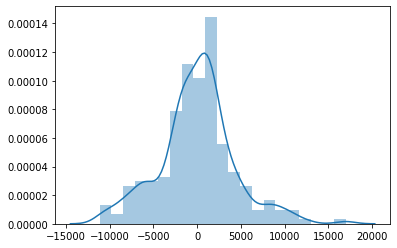

In [35]:
sns.distplot(res)
plt.show()

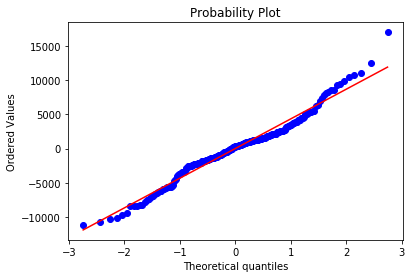

In [36]:
stats.probplot(res, plot = plt)
plt.show()

### 3. LINEARITY

##### errors must be random
##### symmetric with 0 residue line

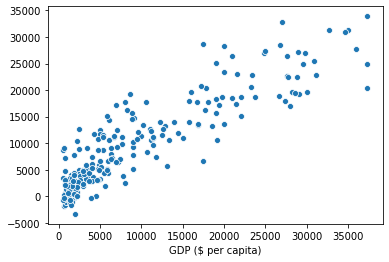

In [37]:
sns.scatterplot(y, ols_no_m.predict())

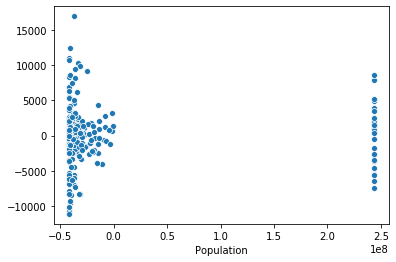

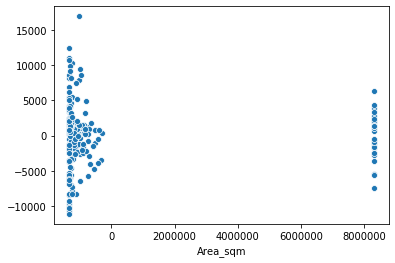

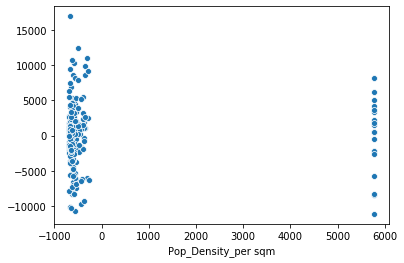

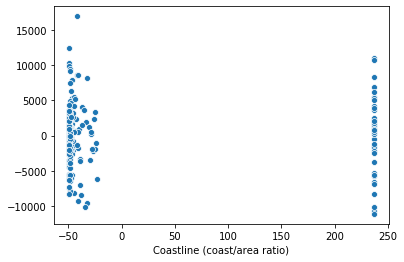

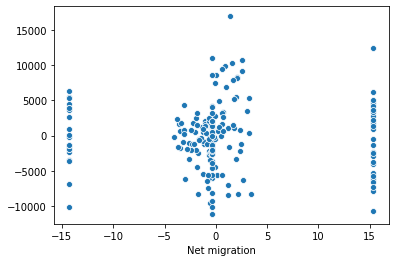

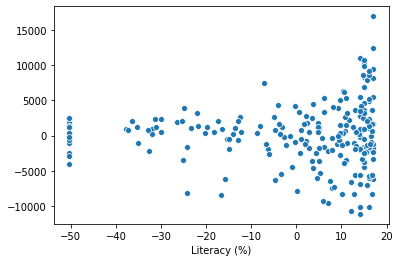

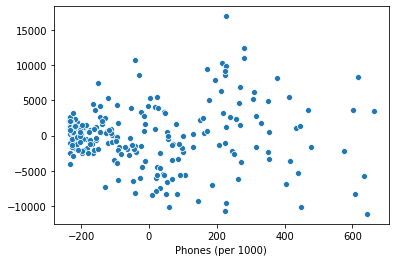

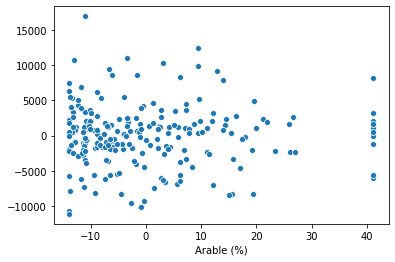

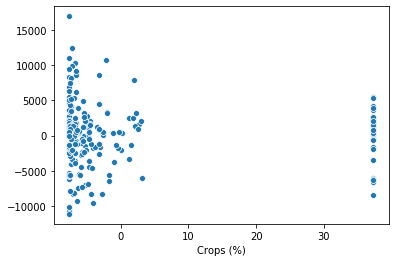

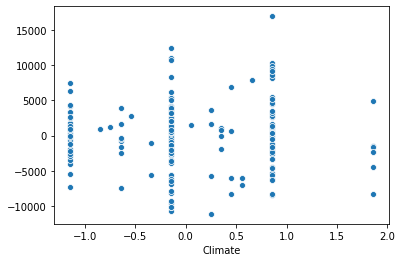

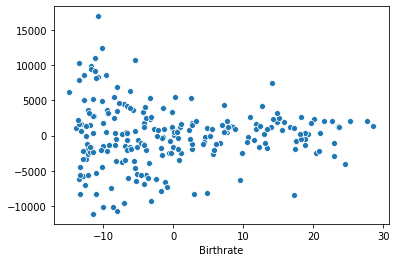

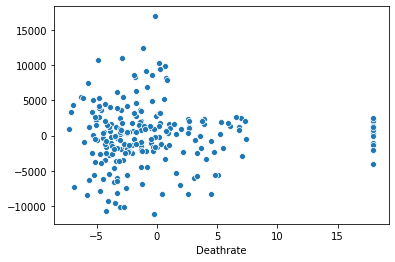

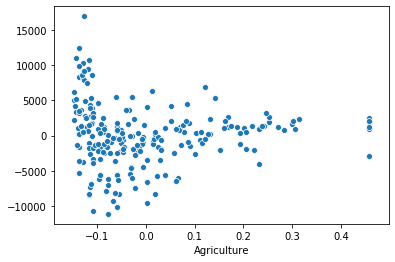

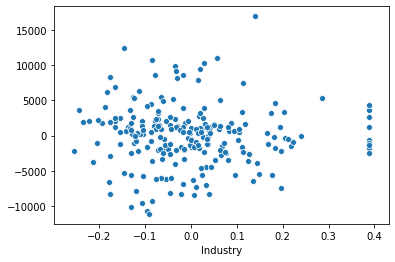

In [38]:
for i in X_partial_sc4.columns:
    sns.scatterplot(X_partial_sc4[i], ols_no_m.resid)
    plt.show()

In [39]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res = ols_no_m, frac = 0.5)
#fraction is how much data
#here we consider 50% of the data
#stats,pval. pval > 0.05 so null hypothesis
#hence data is linear

(0.8285773037282241, 0.8338424695118343)

### 4. HOMOSCEDACITY

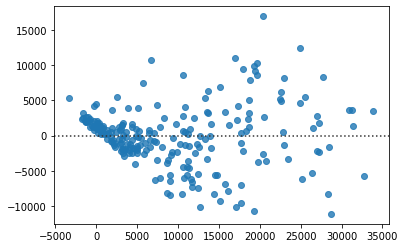

In [40]:
sns.residplot(ols_no_m.predict(),ols_no_m.resid)
plt.show()

#not a perfect homo but also not a hetero

In [41]:
from statsmodels.stats.api import het_goldfeldquandt

stat, pval, arrangemnet = het_goldfeldquandt(ols_no_m.resid, X_partial_sc4)
print('Stat Value: ', stat)
print('PValue: ', pval)
print('Arangemnet: ', arrangemnet)

#pval is greater than 0.05 
#hence the data is homoscedacitic

Stat Value:  0.7124269225010615
PValue:  0.9537219755464738
Arangemnet:  increasing


### 5. AUTO CORRELATION

- ACCEPTABLE 1.5 - 2.5
- NO AUTO CORRELATION = 2
- -VE AUTO CORRELATION < 1.5
- +VE AUTO CORRELATION > 2.5

In [42]:
xp_c = sm.add_constant(X_partial_sc4)

ols_no_m = sm.OLS(y,xp_c).fit()
ols_no_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     60.12
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           9.60e-66
Time:                        10:28:27   Log-Likelihood:                -2224.0
No. Observations:                 227   AIC:                             4478.
Df Residuals:                     212   BIC:                             4529.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         9620.3348    298.964     32.179      0.000    9031.013    1.02e+04
Population                    1.405e-06   3.84e-06      0.366      0.714   -6.16e-06    8.97e-06
Area_sqm                     -2.966e-05      0.000     -0.262      0.794      -0.000       0.000
Pop_Density_per sqm              0.0106      0.187      0.057      0.955      -0.357       0.379
Coastline (coast/area ratio)   -15.2505      3.771     -4.045      0.000     -22.683      -7.818
Net migration                  294.0734     45.252      6.499      0.000     204.871     383.276
Literacy (%)                     8.7987     24.219      0.363      0.717     -38.943      56.540
Phones (per 1000)               32.6500      2.370     13.778      0.000      27.979      37.321
Arable (%)                     -41.8676     26.638     -1.572      0.118     -94.378      10.643
Crops (%)                       -1.3818     23.463     -0.059      0.953     -47.632      44.869
Climate                       -128.6667    555.418     -0.232      0.817   -1223.515     966.182
Birthrate                      -75.7142     57.134     -1.325      0.187    -188.337      36.909
Deathrate                       50.4181     61.482      0.820      0.413     -70.776     171.612
Agriculture                  -5516.0947   3461.857     -1.593      0.113   -1.23e+04    1307.978
Industry                      2457.0810   2833.698      0.867      0.387   -3128.753    8042.915
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               15.039
Skew:                           0.225   Prob(JB):                     0.000542
Kurtosis:                       4.178   Cond. No.                     1.20e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## TRAIN TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(X_partial_sc4, y, random_state = 48, test_size = 0.3)

print('xtrain shape:', xtrain.shape)
print('ytrain shape:', ytrain.shape)
print('xtest shape:', xtest.shape)
print('ytest shape:', ytest.shape)

xtrain shape: (158, 14)
ytrain shape: (158,)
xtest shape: (69, 14)
ytest shape: (69,)


In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(xtrain,ytrain)
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

In [47]:
from statsmodels.tools.eval_measures import rmse

In [48]:
r2_train_lr = r2_score(ytrain, ypred_train)
r2_train_lr

0.8100429697509695

In [49]:
r2_test_lr = r2_score(ytest, ypred_test)
r2_test_lr

0.7279555483928396

## FEATURE ENGINEERING

In [50]:
#! pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

### Backward Elimination

In [51]:
lr = LinearRegression()
lr_backward = sfs(estimator=lr, k_features=6,scoring='r2', forward = False)
y = df_1['GDP ($ per capita)']
sfs_backward = lr_backward.fit(X_partial_sc4, y)
sfs_backward.k_feature_names_

('Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture')

In [52]:
sfs_backward.k_score_

0.7737304006688333

In [53]:
lr_backward = sfs(estimator=lr, k_features=(4,10),scoring='r2', forward = False)
y = df_1['GDP ($ per capita)']
sfs_backward = lr_backward.fit(X_partial_sc4, y)
sfs_backward.k_feature_names_

('Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture')

In [54]:
sfs_backward.k_score_

0.7737304006688333

In [55]:
lr_backward = sfs(estimator=lr, k_features='best',scoring='r2', forward = False)
y = df_1['GDP ($ per capita)']
sfs_backward = lr_backward.fit(X_partial_sc4, y)
sfs_backward.k_feature_names_

('Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture')

In [56]:
sfs_backward.k_score_

0.7737304006688333

In [57]:
feature_backward = list(sfs_backward.k_feature_names_)
feature_backward

['Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture']

### Forward Selection

In [58]:
lr = LinearRegression()
lr_forward = sfs(estimator=lr, k_features='best',scoring='r2', forward = True)
y = df_1['GDP ($ per capita)']
sfs_forward = lr_backward.fit(X_partial_sc4, y)
sfs_forward.k_feature_names_

('Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture')

In [59]:
sfs_forward.k_score_

0.7737304006688333

In [60]:
feature_forward = list(sfs_forward.k_feature_names_)
feature_forward

['Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture']

### Recursive

In [61]:
from sklearn.feature_selection import RFE, RFECV

In [62]:
lr = LinearRegression()
y = df_1['GDP ($ per capita)']
rfe = RFECV(estimator=lr)
rfecv_model = rfe.fit(X_partial_sc4,y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [63]:
rfecv_model.ranking_

array([6, 5, 4, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1])

In [64]:
rank = pd.DataFrame()
rank['Feature'] = X_partial_sc4.columns
rank['Rank'] = rfecv_model.ranking_
rank.sort_values('Rank')

,Feature,Rank
3,Coastline (coast/area ratio),1
4,Net migration,1
6,Phones (per 1000),1
7,Arable (%),1
9,Climate,1
10,Birthrate,1
11,Deathrate,1
12,Agriculture,1
13,Industry,1
5,Literacy (%),2


In [65]:
feature_rfecv = rank[rank['Rank']<4]['Feature']
# should be ==1 to be in alignment with class I used < 4
feature_rfecv

3     Coastline (coast/area ratio)
4                    Net migration
5                     Literacy (%)
6                Phones (per 1000)
7                       Arable (%)
8                        Crops (%)
9                          Climate
10                       Birthrate
11                       Deathrate
12                     Agriculture
13                        Industry
Name: Feature, dtype: object

In [66]:
feature_rfecv = list(feature_rfecv)
feature_rfecv

['Coastline (coast/area ratio)',
 'Net migration',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry']

## building model

In [67]:
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(X_partial_sc4, y, test_size = 0.3, random_state = 48)

In [69]:
### BACKWARD

lr = LinearRegression()
lr.fit(xtrain[feature_backward], ytrain)
ypred_train = lr.predict(xtrain[feature_backward])
ypred_test = lr.predict(xtest[feature_backward])

r2_train = r2_score(ytrain, ypred_train)
r2_test = r2_score(ytest, ypred_test)

print('R2 train & R2 test: ', r2_train, r2_test)

mse_train = mean_squared_error(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)

print('MSE train & MSE test: ', mse_train, mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('RMSE train & RMSE test: ', rmse_train, rmse_test)


R2 train & R2 test:  0.8087081833017111 0.7299176337596316
MSE train & MSE test:  19618576.739286043 20092496.50345691
RMSE train & RMSE test:  4429.286256191402 4482.465449220653


In [70]:
result_backward = (r2_train,r2_test,rmse_train,rmse_test)
result_backward

(0.8087081833017111, 0.7299176337596316, 4429.286256191402, 4482.465449220653)

In [71]:
### FORWARD

lr = LinearRegression()
lr.fit(xtrain[feature_forward], ytrain)
ypred_train = lr.predict(xtrain[feature_forward])
ypred_test = lr.predict(xtest[feature_forward])

r2_train = r2_score(ytrain, ypred_train)
r2_test = r2_score(ytest, ypred_test)

print('R2 train & R2 test: ', r2_train, r2_test)

mse_train = mean_squared_error(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)

print('MSE train & MSE test: ', mse_train, mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('RMSE train & RMSE test: ', rmse_train, rmse_test)


R2 train & R2 test:  0.8087081833017111 0.7299176337596316
MSE train & MSE test:  19618576.739286043 20092496.50345691
RMSE train & RMSE test:  4429.286256191402 4482.465449220653


In [72]:
result_forward = (r2_train,r2_test,rmse_train,rmse_test)
result_forward

(0.8087081833017111, 0.7299176337596316, 4429.286256191402, 4482.465449220653)

In [73]:
### RECURSIVE CV

lr = LinearRegression()
lr.fit(xtrain[feature_rfecv], ytrain)
ypred_train = lr.predict(xtrain[feature_rfecv])
ypred_test = lr.predict(xtest[feature_rfecv])

r2_train = r2_score(ytrain, ypred_train)
r2_test = r2_score(ytest, ypred_test)

print('R2 train & R2 test: ', r2_train, r2_test)

mse_train = mean_squared_error(ytrain, ypred_train)
mse_test = mean_squared_error(ytest, ypred_test)

print('MSE train & MSE test: ', mse_train, mse_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('RMSE train & RMSE test: ', rmse_train, rmse_test)


R2 train & R2 test:  0.8098124085472707 0.728759598655256
MSE train & MSE test:  19505329.199002434 20178647.31962993
RMSE train & RMSE test:  4416.4838049066175 4492.064928251809


In [74]:
result_rfecv = (r2_train,r2_test,rmse_train,rmse_test)
result_rfecv

(0.8098124085472707, 0.728759598655256, 4416.4838049066175, 4492.064928251809)

In [75]:
result_feature  =pd.DataFrame()
result_feature['Backward'] = result_backward
result_feature['Forward'] = result_forward
result_feature['RFECV'] = result_rfecv

result_feature.index = ['R2 Train','R2 Test', 'RMSE Train','RMSE  Test']

In [76]:
result_feature

,Backward,Forward,RFECV
R2 Train,0.808708,0.808708,0.809812
R2 Test,0.729918,0.729918,0.728760
RMSE Train,4429.286256,4429.286256,4416.483805
RMSE Test,4482.465449,4482.465449,4492.064928


In [77]:
# with 6 features backward and forward perform better so we proceed with either one of them
#RMSE is also similar
# RFECV we have 11 features

## CROSS VALIDATION

In [78]:
from sklearn.model_selection import cross_val_score

In [87]:
lr = LinearRegression()
cv_score = cross_val_score(lr, X_partial_sc4, y, cv = 5, scoring = 'r2')

avg_score = np.mean(cv_score)
var_error = np.std(cv_score)

coeff_var = var_error/avg_score

In [88]:
avg_score, var_error, coeff_var

(0.7535360846057294, 0.11345166875800274, 0.15055903901053888)

In [84]:
feature_backward

['Coastline (coast/area ratio)',
 'Net migration',
 'Phones (per 1000)',
 'Arable (%)',
 'Birthrate',
 'Agriculture']

In [89]:
## features backward

lr = LinearRegression()
cv_score = cross_val_score(lr, X_partial_sc4[feature_backward], y, cv = 5, scoring = 'r2')

avg_score = np.mean(cv_score)
var_error = np.std(cv_score)

coeff_var = var_error/avg_score

avg_score, var_error, coeff_var

(0.7737304006688333, 0.10445033994791436, 0.134995781292327)

In [91]:

lr = LinearRegression()
cv_score = cross_val_score(lr, X_partial_sc4[feature_backward], y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

avg_score, var_error, coeff_var

(4434.862920643043, 966.1786176772686, 0.21785986060132276)

In [92]:
#both for first model and second the coeff is high for both
# so we regularize

## REGULARISATION

In [93]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [179]:
lr = LinearRegression()
cv_score = cross_val_score(lr, X_partial_sc4[feature_backward], y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_lr = avg_score, var_error, coeff_var

### RIDGE

In [190]:
ridge_model = Ridge(normalize=True)
cv_score = cross_val_score(ridge_model, X_partial_sc4, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_ridge=avg_score, var_error, coeff_var

In [191]:
ridge_model = Ridge(alpha=0.57
                    ,normalize=True)
cv_score = cross_val_score(ridge_model, X_partial_sc4, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_ridge_5=avg_score, var_error, coeff_var

In [108]:
#for alpha 0.5 the permissable error given by client 5300 is statisfied

### LASSO

In [188]:
lasso_model = Lasso(normalize=True)
cv_score = cross_val_score(lasso_model, X_partial_sc4, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_lasso=avg_score, var_error, coeff_var

In [187]:
lasso_model = Lasso(alpha=126.8,normalize=True)
cv_score = cross_val_score(lasso_model, X_partial_sc4, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_lasso_126= avg_score, var_error, coeff_var

### ELASTIC NET

In [186]:
en_model = ElasticNet(normalize=True)
cv_score = cross_val_score(en_model, X_partial_sc4, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_en=avg_score, var_error, coeff_var

In [185]:
en_model = ElasticNet(alpha=0.00632,normalize=True)
cv_score = cross_val_score(en_model, X_partial_sc4, y, cv = 5, scoring = 'neg_mean_squared_error')
rmse = np.sqrt(abs(cv_score))
avg_score = np.mean(rmse)
var_error = np.std(rmse)

coeff_var = var_error/avg_score

result_en_6=avg_score, var_error, coeff_var

In [203]:
score_card = pd.DataFrame()
score_card['Linear'] = result_lr
score_card['Ridge alpha = 1'] = result_ridge
score_card['Ridge alpha = 0.5'] = result_ridge_5
score_card['Lasso alpha = 1']= result_lasso
score_card['Lasso alpha = 126.8']= result_lasso_126
score_card['Elastic Net alpha = 1'] = result_en
score_card['Elastic Net alpha = 0.00632'] = result_en_6

score_card.index = ['Model Bias Error','Variance Error','Coeff of Variance Error']

In [204]:
score_card

,Linear,Ridge alpha = 1,Ridge alpha = 0.5,Lasso alpha = 1,Lasso alpha = 126.8,Elastic Net alpha = 1,Elastic Net alpha = 0.00632
Model Bias Error,4434.862921,5682.751452,5294.786650,4613.220849,5299.416270,9479.429619,5299.192809
Variance Error,966.178618,356.526277,484.820291,1001.666875,747.045659,453.903166,482.100374
Coeff of Variance Error,0.217860,0.062738,0.091566,0.217130,0.140968,0.047883,0.090976


In [196]:
#Elastic Net 0.000632 and Ridge 0.5 are better

In [197]:
model_lr = LinearRegression()
model_lr.fit(xtrain,ytrain)
model_lr.coef_

array([ 9.11665712e-07, -5.35879567e-05,  3.69014119e-02, -1.64941500e+01,
        2.16185526e+02,  1.85510489e+01,  3.73400049e+01, -4.50522552e+01,
       -1.09696254e+01, -2.07021630e+02, -1.72718284e+01,  3.49655158e+01,
       -5.18383386e+03,  1.19208981e+03])

In [198]:
model_ridge = Ridge(alpha=0.5,normalize=True)
model_ridge.fit(xtrain,ytrain)
model_ridge.coef_

array([ 1.01188641e-06,  4.57114981e-05,  1.59738806e-01, -4.95469768e+00,
        2.07495868e+02,  3.67503757e+01,  1.76443774e+01, -1.05945471e+01,
       -4.11609272e+01,  7.96432119e+02, -1.24380830e+02,  4.40003488e+00,
       -9.96094811e+03, -2.02984752e+03])

In [201]:
model_lasso = Lasso(alpha=126.8,normalize=True)
model_lasso.fit(xtrain,ytrain)
model_lasso.coef_

array([ 0.        ,  0.        ,  0.        , -0.        , 32.28743775,
        0.        , 32.39132481, -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [205]:
model_en = ElasticNet(alpha=0.00632,normalize=True)
model_en.fit(xtrain,ytrain)
model_en.coef_

array([ 1.01154724e-06,  4.57040213e-05,  1.59673807e-01, -4.96107264e+00,
        2.07549316e+02,  3.67364360e+01,  1.76544763e+01, -1.06092056e+01,
       -4.11523579e+01,  7.96027152e+02, -1.24366000e+02,  4.42396328e+00,
       -9.96109061e+03, -2.02956616e+03])

In [207]:
coef_table = pd.DataFrame({'Linear':model_lr.coef_,
                          'Ridge':model_ridge.coef_,
                          'Lasso':model_lasso.coef_,
                          'Elastic Net':model_en.coef_})

coef_table.index= xtrain.columns
coef_table

,Linear,Ridge,Lasso,Elastic Net
Population,9.116657e-07,0.000001,0.000000,0.000001
Area_sqm,-5.358796e-05,0.000046,0.000000,0.000046
Pop_Density_per sqm,3.690141e-02,0.159739,0.000000,0.159674
Coastline (coast/area ratio),-1.649415e+01,-4.954698,-0.000000,-4.961073
Net migration,2.161855e+02,207.495868,32.287438,207.549316
Literacy (%),1.855105e+01,36.750376,0.000000,36.736436
Phones (per 1000),3.734000e+01,17.644377,32.391325,17.654476
Arable (%),-4.505226e+01,-10.594547,-0.000000,-10.609206
Crops (%),-1.096963e+01,-41.160927,-0.000000,-41.152358
Climate,-2.070216e+02,796.432119,0.000000,796.027152


### HYPER PARAMETER TUNING

In [209]:
from sklearn.model_selection import GridSearchCV

### RIDGE

In [211]:
param = {'alpha':[0.0001,0.001,0.01,0.02,0.03,0.05,0.06,0.07,0.1,0.5,1,5,10,100,125,150,200]}

rid = Ridge(normalize=True)
grid_mod = GridSearchCV(rid, param_grid=param, cv = 5, scoring = 'r2')

tun_mod = grid_mod.fit(xtrain,ytrain)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [212]:
tun_mod.best_params_

{'alpha': 0.03}

In [213]:
tun_mod.best_score_

0.7488321727032482

In [217]:
pd.DataFrame(tun_mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002791,7.457547e-04,0.001597,4.877018e-04,0.0001,{'alpha': 0.0001},0.841076,0.790135,0.646391,0.765976,0.688140,0.746588,0.070495,8
1,0.002991,6.311288e-04,0.001596,4.890647e-04,0.001,{'alpha': 0.001},0.841088,0.790356,0.646983,0.765841,0.688189,0.746738,0.070341,6
2,0.003192,3.990890e-04,0.001598,4.855901e-04,0.01,{'alpha': 0.01},0.840933,0.792175,0.652262,0.764411,0.688413,0.747908,0.068922,4
3,0.002992,5.352484e-07,0.001995,6.143617e-07,0.02,{'alpha': 0.02},0.840267,0.793487,0.656969,0.762691,0.688202,0.748613,0.067566,2
4,0.003390,4.879162e-04,0.001397,4.890265e-04,0.03,{'alpha': 0.03},0.839199,0.794213,0.660702,0.760873,0.687639,0.748832,0.066387,1
5,0.002992,3.371748e-07,0.001595,4.885202e-04,0.05,{'alpha': 0.05},0.836207,0.794378,0.665984,0.757059,0.685815,0.748223,0.064409,3
6,0.003191,3.978016e-04,0.002195,1.164307e-03,0.06,{'alpha': 0.06},0.834409,0.793988,0.667803,0.755104,0.684682,0.747543,0.063557,5
7,0.003790,9.779148e-04,0.001595,4.885584e-04,0.07,{'alpha': 0.07},0.832472,0.793367,0.669205,0.753136,0.683457,0.746682,0.062771,7
8,0.003192,7.468754e-04,0.001396,4.889280e-04,0.1,{'alpha': 0.1},0.826123,0.790528,0.671584,0.747244,0.679505,0.743372,0.060698,9
9,0.002792,3.986602e-04,0.001197,3.989939e-04,0.5,{'alpha': 0.5},0.746601,0.734664,0.650606,0.684375,0.639615,0.691542,0.043233,10


In [218]:
pd.DataFrame(tun_mod.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002791,7.457547e-04,0.001597,4.877018e-04,0.0001,{'alpha': 0.0001},0.841076,0.790135,0.646391,0.765976,0.688140,0.746588,0.070495,8
1,0.002991,6.311288e-04,0.001596,4.890647e-04,0.001,{'alpha': 0.001},0.841088,0.790356,0.646983,0.765841,0.688189,0.746738,0.070341,6
2,0.003192,3.990890e-04,0.001598,4.855901e-04,0.01,{'alpha': 0.01},0.840933,0.792175,0.652262,0.764411,0.688413,0.747908,0.068922,4
3,0.002992,5.352484e-07,0.001995,6.143617e-07,0.02,{'alpha': 0.02},0.840267,0.793487,0.656969,0.762691,0.688202,0.748613,0.067566,2
4,0.003390,4.879162e-04,0.001397,4.890265e-04,0.03,{'alpha': 0.03},0.839199,0.794213,0.660702,0.760873,0.687639,0.748832,0.066387,1


In [220]:
pd.DataFrame(tun_mod.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.003390,4.879162e-04,0.001397,4.890265e-04,0.03,{'alpha': 0.03},0.839199,0.794213,0.660702,0.760873,0.687639,0.748832,0.066387,1
3,0.002992,5.352484e-07,0.001995,6.143617e-07,0.02,{'alpha': 0.02},0.840267,0.793487,0.656969,0.762691,0.688202,0.748613,0.067566,2
5,0.002992,3.371748e-07,0.001595,4.885202e-04,0.05,{'alpha': 0.05},0.836207,0.794378,0.665984,0.757059,0.685815,0.748223,0.064409,3
2,0.003192,3.990890e-04,0.001598,4.855901e-04,0.01,{'alpha': 0.01},0.840933,0.792175,0.652262,0.764411,0.688413,0.747908,0.068922,4
6,0.003191,3.978016e-04,0.002195,1.164307e-03,0.06,{'alpha': 0.06},0.834409,0.793988,0.667803,0.755104,0.684682,0.747543,0.063557,5
1,0.002991,6.311288e-04,0.001596,4.890647e-04,0.001,{'alpha': 0.001},0.841088,0.790356,0.646983,0.765841,0.688189,0.746738,0.070341,6
7,0.003790,9.779148e-04,0.001595,4.885584e-04,0.07,{'alpha': 0.07},0.832472,0.793367,0.669205,0.753136,0.683457,0.746682,0.062771,7
0,0.002791,7.457547e-04,0.001597,4.877018e-04,0.0001,{'alpha': 0.0001},0.841076,0.790135,0.646391,0.765976,0.688140,0.746588,0.070495,8
8,0.003192,7.468754e-04,0.001396,4.889280e-04,0.1,{'alpha': 0.1},0.826123,0.790528,0.671584,0.747244,0.679505,0.743372,0.060698,9
9,0.002792,3.986602e-04,0.001197,3.989939e-04,0.5,{'alpha': 0.5},0.746601,0.734664,0.650606,0.684375,0.639615,0.691542,0.043233,10


### LASSO

In [221]:
param = {'alpha':[0.0001,0.001,0.01,0.02,0.03,0.05,0.06,0.07,0.1,0.5,1,5,10,100,125,150,200]}

las = Lasso(normalize=True)
grid_mod = GridSearchCV(las, param_grid=param, cv = 5, scoring = 'r2')

tun_mod = grid_mod.fit(xtrain,ytrain)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [223]:
tun_mod.best_params_

{'alpha': 10}

In [224]:
tun_mod.best_score_

0.7591627666428141

In [222]:
pd.DataFrame(tun_mod.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.001995,0.000630,0.000997,9.122432e-07,10,{'alpha': 10},0.850201,0.790899,0.673052,0.777646,0.702833,0.759163,0.063827,1
11,0.002992,0.000630,0.001001,6.778136e-06,5,{'alpha': 5},0.846243,0.791033,0.663675,0.773676,0.697891,0.754741,0.065928,2
10,0.002195,0.000746,0.000996,9.887906e-07,1,{'alpha': 1},0.842066,0.790414,0.650082,0.768153,0.690359,0.748455,0.069496,3
9,0.002593,0.000797,0.001196,3.993532e-04,0.5,{'alpha': 0.5},0.841517,0.790271,0.648216,0.767159,0.689286,0.747531,0.069985,4
8,0.001795,0.000746,0.000998,1.016010e-06,0.1,{'alpha': 0.1},0.841159,0.790144,0.646704,0.766229,0.688389,0.746768,0.070402,5
7,0.001995,0.000631,0.001397,4.885779e-04,0.07,{'alpha': 0.07},0.841133,0.790134,0.646590,0.766158,0.688312,0.746709,0.070435,6
6,0.002194,0.000399,0.001397,4.882875e-04,0.06,{'alpha': 0.06},0.841125,0.790130,0.646552,0.766134,0.688287,0.746689,0.070447,7
5,0.002193,0.000399,0.000998,1.072619e-06,0.05,{'alpha': 0.05},0.841117,0.790127,0.646514,0.766110,0.688261,0.746669,0.070458,8
4,0.002393,0.000488,0.000798,3.990433e-04,0.03,{'alpha': 0.03},0.841100,0.790120,0.646437,0.766063,0.688210,0.746630,0.070480,9
3,0.002392,0.000487,0.001197,3.982074e-04,0.02,{'alpha': 0.02},0.841092,0.790117,0.646400,0.766039,0.688185,0.746610,0.070491,10


### GRADIENT DESCENT

In [239]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A = X.drop(['Infant mortality (per 1000 births)','Other (%)','Service'],axis = 1)
X_scaled = sc.fit_transform(A)
X_scaled = pd.DataFrame(X_scaled, columns = A.columns)

In [240]:
X_scaled

,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Literacy (%),Phones (per 1000),Arable (%),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Industry
0,-0.115094,-0.220266,-0.347864,-0.470180,2.143829,-2.537552,-1.041107,-0.132135,-0.502354,-1.694570,2.210162,3.055247,1.612835,-0.263552
1,-0.414949,-0.418770,-0.306272,-0.458127,-1.993115,0.181254,-0.736564,0.539398,-0.218337,1.260999,-0.631504,-0.738826,0.583345,-0.645495
2,-0.094652,2.659029,-0.366433,-0.469797,-0.107041,-0.650571,-0.705662,-0.799921,-0.500325,-1.694570,-0.448316,-0.842529,-0.327892,2.850162
3,-0.453407,-0.427929,-0.216248,2.263057,-1.993115,0.710596,0.106750,-0.291774,2.527233,-0.216785,0.031762,-1.070336,-0.199902,-0.476559
4,-0.453260,-0.427843,-0.291340,-0.470180,2.143829,0.861837,1.171305,-0.874869,-0.517231,1.260999,-1.209041,-0.563721,-0.670128,-0.394294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.427185,-0.426113,-0.145933,-0.470180,0.363187,-0.234154,-0.405151,0.225366,2.527233,1.260999,0.862875,-0.959833,-0.404408,0.030250
223,-0.451058,-0.342656,-0.373383,-0.466162,-0.057088,0.468611,0.248631,-1.039754,-0.517231,-1.694570,-0.207014,-0.596702,-0.231899,-0.901103
224,-0.219874,-0.258613,-0.351882,-0.466736,-0.052623,-1.648760,-0.888836,-0.832898,-0.501002,-1.694570,1.875371,-0.215210,-0.091388,1.440500
225,-0.328509,-0.186544,-0.365619,-0.470180,-0.052623,-0.116187,-1.018714,-0.510622,-0.515202,-0.216785,1.704816,3.055247,0.499873,0.103700


In [242]:
xtrain_sc , xtest_sc, ytrain_sc, ytest_sc  = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)

In [243]:
from sklearn.linear_model import SGDRegressor

In [244]:
sgd = SGDRegressor()
sgd.fit(xtrain_sc,ytrain_sc)
ypred = sgd.predict(xtest_sc)

r2_score(ytest_sc,ypred)

0.7662432193147222

In [237]:
from sklearn.preprocessing import PolynomialFeatures

In [246]:
pf  = PolynomialFeatures(degree = 2, include_bias= False, interaction_only=True)
x_pf = pf.fit_transform(A)
x_pf = pd.DataFrame(x_pf, index = A.index)
x_pf.columns = pf.get_feature_names()

In [247]:
x_pf

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x9 x10,x9 x11,x9 x12,x9 x13,x10 x11,x10 x12,x10 x13,x11 x12,x11 x13,x12 x13
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,31056997.0,647500.0,48.0,0.0000,15.7414,32.57,3.20,12.13,0.220,1.0,...,46.600,27.5374,0.3800,0.24000,1283.242840,17.708000,11.184000,10.464212,6.608976,0.091200
Albania,3581655.0,28748.0,124.6,1.2600,-13.9070,86.50,71.20,21.09,4.420,3.0,...,45.330,15.6600,0.6960,0.56400,78.874200,3.505520,2.840680,1.211040,0.981360,0.043616
Algeria,32930091.0,9622460.4,13.8,0.0400,-0.3900,70.00,78.10,3.22,0.250,1.0,...,17.140,4.6100,0.1010,0.66392,79.015400,1.731140,11.379589,0.465610,3.060671,0.067056
American Samoa,57794.0,199.0,290.4,285.7248,-13.9070,97.00,259.50,10.00,45.021,2.0,...,44.920,6.5400,0.2388,0.42200,73.444200,2.681724,4.739060,0.390438,0.689970,0.025193
Andorra,71201.0,468.0,152.1,0.0000,15.7414,100.00,497.20,2.22,0.000,3.0,...,26.130,18.7500,0.1554,0.66660,54.437500,0.451178,1.935362,0.323750,1.388750,0.011510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,2460492.0,5860.0,419.9,0.0000,2.9800,78.26,145.20,16.90,45.021,3.0,...,95.010,11.7600,0.2700,0.84000,124.146400,2.850300,8.867600,0.352800,1.097600,0.025200
Western Sahara,273008.0,266000.0,1.0,0.4200,-0.0320,92.20,291.18,0.02,0.000,1.0,...,19.814,6.0560,0.1148,0.15320,119.993584,2.274647,3.035505,0.695229,0.927779,0.017587
Yemen,21456188.0,527970.0,40.6,0.3600,0.0000,50.20,37.20,2.78,0.240,1.0,...,42.890,8.3000,0.1350,0.47200,355.987000,5.790150,20.244080,1.120500,3.917600,0.063720


In [248]:
x_pf.shape

(227, 105)

In [251]:
A.shape

(227, 14)

In [252]:
lr = LinearRegression()
lr_backward = sfs(estimator=lr, k_features='best',scoring='r2', forward = False)
y = df_1['GDP ($ per capita)']
sfs_backward = lr_backward.fit(x_pf, y)
sfs_backward.k_feature_names_

('x2',
 'x6',
 'x11',
 'x0 x9',
 'x0 x13',
 'x2 x9',
 'x3 x6',
 'x3 x10',
 'x3 x12',
 'x4 x6',
 'x4 x7',
 'x5 x10',
 'x5 x12',
 'x6 x10',
 'x6 x11',
 'x7 x9',
 'x9 x10',
 'x10 x11',
 'x10 x12')